## 【問題1】コンペティション内容の把握

・Home Creditはどのような企業？  
  十分なクレジット情報や融資履歴がない人々に、金融サービスの門戸を開いて利用可能にする会社。  
・このコンペティションでは何を予測する？  
　クレジット契約における顧客の多様な情報（説明変数）から、クレジット契約が停滞するかどうか（目的変数）を予測する。  
・それを予測することで企業が得られるメリットは何？  
　顧客の返済能力を予測することで融資対象者を選別し、金銭的な収益機会を拡大する。（クレジット情報や融資履歴はない人々に対しての融資を、今までよりも高確率で成功させられるようになる。）  

## 【問題2】データの概観の把握
.head()、.info()、describe()などを使う
    欠損値の有無を見る
    クラスごとのデータ数をグラフに出す

# ●.head()、.info()、describe()などを使う

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches

In [2]:
# .head()について。
# 考察：説明変数がひととおり把握できる。性別や学歴、家族構成や職業についての個人的な情報、
# 住居に関する情報、電話契約、クレジット契約に関する情報が含まれている。
h_credit = pd.read_csv("application_train.csv")
pd.set_option('display.max_columns', 150)
h_credit.DAYS_LAST_PHONE_CHANGE.head(50)

0    -1134.0
1     -828.0
2     -815.0
3     -617.0
4    -1106.0
5    -2536.0
6    -1562.0
7    -1070.0
8        0.0
9    -1673.0
10    -844.0
11   -2396.0
12   -2370.0
13      -4.0
14    -188.0
15    -925.0
16      -3.0
17   -2811.0
18    -239.0
19   -1850.0
20    -296.0
21       0.0
22    -468.0
23    -795.0
24      -4.0
25       0.0
26    -161.0
27      -2.0
28    -849.0
29    -599.0
30   -1634.0
31    -397.0
32   -2766.0
33    -697.0
34   -3019.0
35   -1285.0
36   -2411.0
37   -1541.0
38       0.0
39    -540.0
40   -1075.0
41    -458.0
42   -1480.0
43    -491.0
44    -556.0
45    -462.0
46    -649.0
47   -1247.0
48    -784.0
49   -1498.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [4]:
# describeについて
# 考察：文字型のデータが排除されているので注意が必要である。
# また数値型であっても、FLAG_DOCUMENT_4のような、０または１のデータが存在している。
pd.set_option('display.max_rows', 150)
h_credit.describe()
#h_credit.describe().query("mean > 0.3")

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [17]:
# infoについて
# データ数が約30万、説明変数の数がIDやtargetを取り除いて120個ある。
h_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# ●欠損値の有無を見る

　考察：住居に関する情報は欠損値が大きい傾向にある（10万以上の欠損がある）。

In [5]:
pd.set_option('display.max_rows', 200)
h_credit.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## ・クラスごとのデータ数をグラフに出す  

考察：支払いが滞る場合を示すクラス１のサンプル数が、支払いが滞らない場合をしめすクラス０のサンプル数よりも断然少ない。  
棒グラフを大雑把に比較する限りでは、クラス１のサンプル数の分布とクラス２のサンプル数の分布には大差がない。

In [4]:
h_credit_1 = h_credit[h_credit['TARGET']==1]
h_credit_0 = h_credit[h_credit['TARGET']==0]

In [27]:
h_credit_0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,282686.000000,282686.0,282686.000000,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,97006.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282684.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,124079.000000,2.820780e+05,227398.000000,140910.000000,118781.000000,146487.000000,95949.000000,86244.000000,133710.000000,142069.000000,143730.000000,92052.000000,116200.000000,90609.000000,142447.000000,87499.000000,128334.000000,140910.000000,118781.000000,146487.000000,95949.000000,86244.000000,133710.000000,142069.000000,143730.000000,92052.000000,116200.000000,90609.000000,142447.000000,87499.000000,128334.000000,140910.000000,118781.000000,146487.000000,95949.000000,86244.000000,133710.000000,142069.000000,143730.000000,92052.000000,116200.000000,90609.000000,142447.000000,87499.000000,128334.000000,147961.000000,281701.000000,281701.000000,281701.000000,281701.000000,282685.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,245459.000000,245459.000000,245459.000000,245459.000000,245459.000000,245459.000000
mean,278244.744536,0.0,0.412946,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,0.021021,-16138.176397,65696.146123,-5029.941065,-3017.219788,11.935540,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.150154,2.043578,2.022449,12.086807,0.014942,0.050317,0.040494,0.074641,0.224090,0.175856,0.511461,5.234787e-01,0.520969,0.118314,0.088952,0.977893,0.753153,0.045005,0.080194,0.150249,0.228023,0.233370,0.066575,0.101405,0.108400,0.008850,0.028615,0.115036,0.088001,0.977225,0.760297,0.042885,0.075647,0.145673,0.224015,0.229493,0.065186,0.106268,0.106916,0.008096,0.027265,0.118721,0.088448,0.977916,0.7564

In [28]:
h_credit_1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,7576.000000,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.00000,24825.000000,10054.000000,24773.000000,19148.000000,10540.000000,8787.000000,11017.000000,7074.000000,6402.000000,9910.000000,10614.000000,10761.000000,6817.00000,8721.000000,6703.000000,10714.000000,6498.000000,9495.000000,10540.000000,8787.000000,11017.000000,7074.000000,6402.000000,9910.000000,10614.000000,10761.000000,6817.000000,8721.000000,6703.000000,10714.000000,6498.000000,9495.000000,10540.000000,8787.000000,11017.000000,7074.000000,6402.000000,9910.000000,10614.000000,10761.000000,6817.000000,8721.000000,6703.000000,10714.000000,6498.000000,9495.000000,11119.000000,24789.000000,24789.000000,24789.000000,24789.000000,24825.000000,24825.000000,24825.000000,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.0,24825.000000,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,-14884.828077,42394.675448,-4487.127009,-2732.099617,13.668691,1.0,0.879517,0.237825,0.998187,0.244955,0.055347,2.181269,2.153635,2.134824,11.797100,0.017442,0.055911,0.042538,0.118389,0.30292,0.221672,0.386968,0.410935,0.390717,0.105766,0.081548,0.975634,0.743231,0.039444,0.062036,0.142707,0.203021,0.21196,0.063108,0.092255,0.094096,0.008252,0.024887,0.103463,0.081359,0.974938,0.750688,0.038088,0.058880,0.138769,0.199612,0.208695,0.061922,0.097226,0.093461,0.007812,0.023739,0.106211,0.081283,0.975570,0.746532,0.039404,0.061352,0.142227,0.202692,0.211754,0.063793,0.093478,0.095206,0.008171,0.024796,0.089769,1.496147,0.191980,1.477672,0.138247,-808.7968

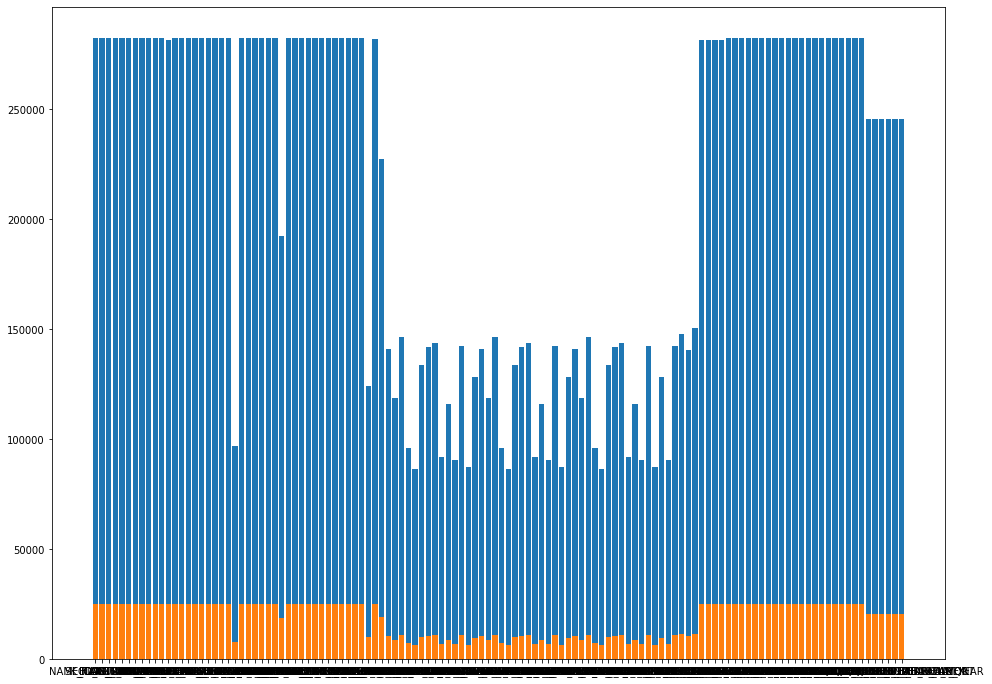

In [6]:
left = h_credit_0.keys()
height0 = []
height1 = []

for i in h_credit_0.keys():
    height0.append(h_credit_0[i].count())
    height1.append(h_credit_1[i].count())

plt.figure(figsize=(16,12))
plt.bar(left, height0)
plt.bar(left, height1)
plt.show()

## 【問題３】　課題設定  

＜概説＞  
　完済できないリスクを見積もる上で、下記の４つの観点を切り口として検討を進めていく。  
Ａ．その人の経済状況（収入やローンの大きさ、家屋の資産価値、自動車所有の有無、職業など）  
Ｂ．その人の性格（携帯電話の乗り換え頻度、クレジット問合せ頻度、職業など。）  
Ｃ．その他（住んでいる地域、性別、家族構成など）  
  
（１）Ａについて  
　経済状況→低なら、返済能力→低という傾向になると考えられる（仮説１）。  
（２）Ｂについて  
　衝動性が低く、不真面目な人間であれば、返済能力が低くなるものと考えられる（仮説２）。  
（４）Ｃについて  
　性別や居住地域などは、返済能力とそれなりの関係があるかもしれないが表面的な仮説にとどまりそう。  
　Ｂと関係しそうなので、Ｂに付随して検討をするのがよさそうだ。  
（５）ＡとＢについて  
　以上から、ＡとＢの双方からの検証をすることで返済停滞リスクが高い者を見つけやすくなることが考えられる。  
　仮説１と仮説２に当てはまる場合には、より返済能力が低くなりそうだ（仮説３）。  


# 【問題４】　データ探索

## ★★ローンについての検討（AMT_INCOME_TOTAL、AMT_CREDIT、AMT_ANNUITY、AMT_GOODS_PRICE、NAME_TYPE_SUITE）  
・収入が大きい方が停滞しなさそう（AMT_INCOME_TOTAL）  
・AMTの4つのパラメータは相関性が高そうだが、収入とローンの比率を見ることで停滞リスクが見積もれるかもしれない。（AMT_INCOME_TOTAL＆AMT_CREDIT）  
・ローン契約時に同伴者がいる方が、社会的な信用があり停滞しにくそうだ（NAME_TYPE_SUITE）  

## ★AMD_INCOME_TOTAL についての検討

<Figure size 1080x360 with 0 Axes>

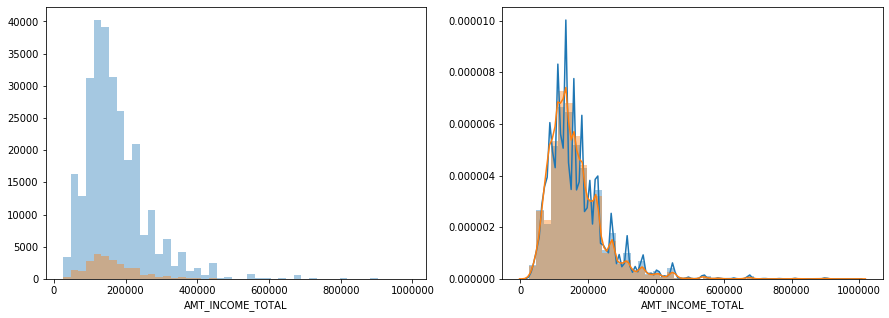

In [7]:
plt.figure(figsize=(15,5))

fig, ax = plt.subplots(figsize=[15, 5])
plt.subplot(1,2,1)
h_credit_0_temp = h_credit_0.query("AMT_INCOME_TOTAL<1000000")
h_credit_1_temp = h_credit_1.query("AMT_INCOME_TOTAL<1000000")
ax=sns.distplot(h_credit_0_temp.AMT_INCOME_TOTAL,bins = 45, kde = False)
ax=sns.distplot(h_credit_1_temp.AMT_INCOME_TOTAL,bins = 45, kde = False)

plt.subplot(1,2,2)
h_credit_0_temp = h_credit_0.query("AMT_INCOME_TOTAL<1000000")
h_credit_1_temp = h_credit_1.query("AMT_INCOME_TOTAL<1000000")
ax=sns.distplot(h_credit_0_temp.AMT_INCOME_TOTAL,bins = 45, kde = True)
ax=sns.distplot(h_credit_1_temp.AMT_INCOME_TOTAL,bins = 45, kde = True)

#ax.add_patch(patches.Ellipse((300000, 0), 100000, 3000, fill = False, ec='r',color='w'))    


AMT_INCOME_TOTALについて  
　・左のグラフで見られるように、250000以上(2500万円以上？)では急激にTARGET=1のサンプル数が減少しているため、収入が一定値を超えることで停滞リスクが非常に低くなると言えそうだ。  
　・TARGET=0では巨額収入を持つ場合があり有意なグラフが得られないため、上限を10e6としている。  
　・TAEGET=0の度数分布に波があるせいか、確率密度関数にしたりbin数を調整したが有意なグラフは得づらかった。  

## ★AMT_INCOME_TOTALとAMT_CREDITについての検討

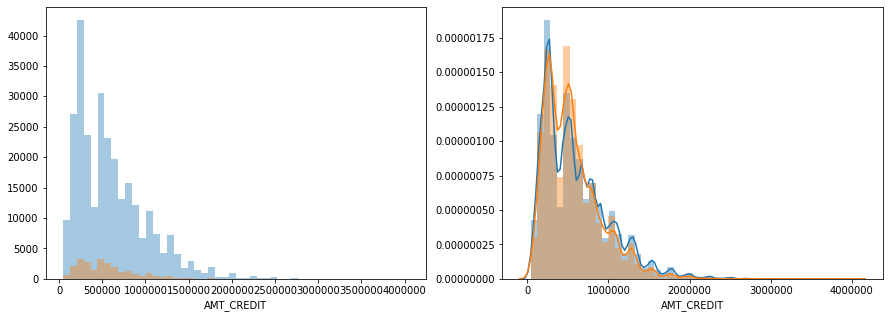

In [8]:
fig, ax = plt.subplots(figsize=[15, 5])
plt.subplot(1,2,1)
ax=sns.distplot(h_credit_0.AMT_CREDIT, kde = False)
ax=sns.distplot(h_credit_1.AMT_CREDIT, kde = False)
plt.subplot(1,2,2)
ax=sns.distplot(h_credit_0.AMT_CREDIT, kde = True)
ax=sns.distplot(h_credit_1.AMT_CREDIT, kde = True)

AMT_CREDITについて  
　・度数分布表（右）と、度数分布表に基づく確率密度分布（左）を作成した。  
  ・確率分布表から、ローン額が40000～70000（約4000万～7000万円）の条件下では、支払いが停滞するリスクが高くなるものと思われる。  

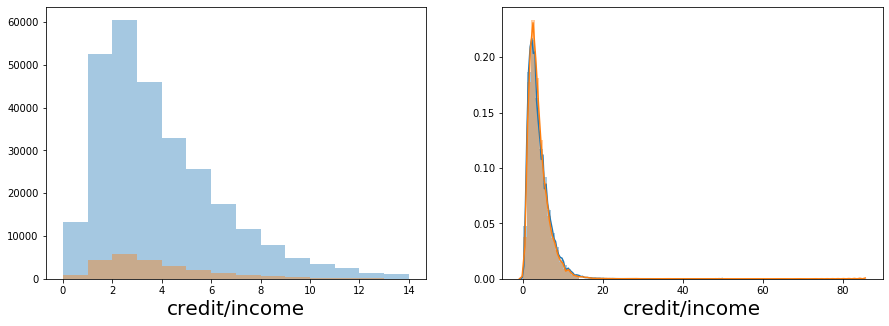

In [9]:
# AMT_CREDIT／AMT_INCOME_TOTALについて

fig, ax = plt.subplots(figsize = [15, 5])
plt.subplot(1,2,1)
#ax.axes.set_xlim(0, 20)

plt.xlabel("credit/income",size = 20)
ax=sns.distplot(h_credit_0["AMT_CREDIT"]/h_credit_0["AMT_INCOME_TOTAL"]
, kde = False, bins = [i for i in range(15)])
ax=sns.distplot(h_credit_1["AMT_CREDIT"]/h_credit_1["AMT_INCOME_TOTAL"]
, kde = False, bins = [i for i in range(15)])

plt.subplot(1,2,2)
plt.xlabel("credit/income",size = 20)
ax=sns.distplot(h_credit_0["AMT_CREDIT"]/h_credit_0["AMT_INCOME_TOTAL"]
, kde = True, bins = [i for i in range(15)])
ax=sns.distplot(h_credit_1["AMT_CREDIT"]/h_credit_1["AMT_INCOME_TOTAL"]
, kde = True, bins = [i for i in range(15)])

AMT_CREDIT／AMT_INCOME_TOTALについて（１）  
・左側の度数分布表は、target0とtarget1のそれぞれにてAMT_CREDIT／AMT_INCOME_TOTALを導出して、棒グラフにプロットしたものである。  
・右側は確率密度関数であるが、target0とtarget1とで、ほとんど差異は見られない。

参考temp_icの値:
(0, 1]      0.068790
(1, 2]      0.083372
(2, 3]      0.095167
(3, 4]      0.100235
(4, 5]      0.092558
(5, 6]      0.082870
(6, 7]      0.081496
(7, 8]      0.076608
(8, 9]      0.083783
(9, 10]     0.072320
(10, 11]    0.070118
(11, 12]    0.079683
(12, 13]    0.063184
(13, 14]    0.062620
dtype: float64
平均：0.08781828601345662


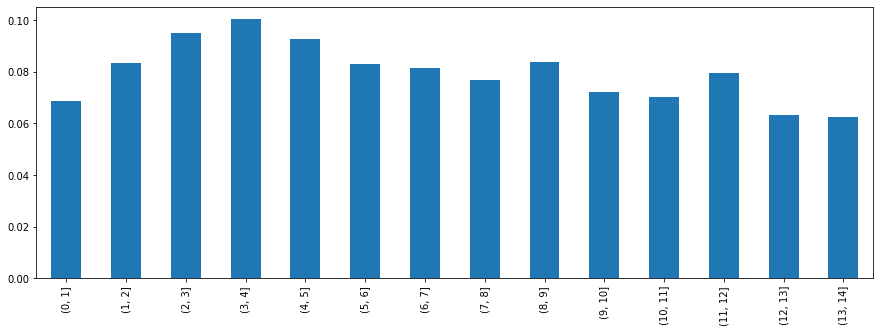

In [10]:
# target0と1の場合での、credit/income特徴量に加工
h_credit_0_ic_ratio = h_credit_0["AMT_CREDIT"]/h_credit_0["AMT_INCOME_TOTAL"]
h_credit_1_ic_ratio = h_credit_1["AMT_CREDIT"]/h_credit_1["AMT_INCOME_TOTAL"]

# 0～14倍にて、1倍刻みに集計するためにpd.cut
temp0 = pd.cut(h_credit_0_ic_ratio,[i for i in range(15)])
temp1 = pd.cut(h_credit_1_ic_ratio,[i for i in range(15)])

# value_countsでキー（倍数）とバリュー（度数）が取得される。
# sort_indexで、キーを基準として並び替えられる。
temp0 = temp0.value_counts().sort_index()
temp1 = temp1.value_counts().sort_index()

# temp_icをひとまず生成しておき、temp1/temp0の値を順次代入していく 
temp_ic = temp0
for i in range(len(temp0)):
    temp_ic.iloc[i] = temp1.iloc[i]/temp0.iloc[i]

fig, ax = plt.subplots(figsize = [15, 5])
temp_ic.plot.bar()    

print("参考temp_icの値:\n{}".format(temp_ic))
print("平均：{}".format(24825/282686))

AMT_CREDIT／AMT_INCOME_TOTALについて（２）
・単に度数分布表にしてtarget0とtarget1を比較するだけでは傾向がよくわからなかったので、度数分布におけるtarget1をtarget0で除したものをグラフ化した（すなわち、AMT_CREDIT／AMT_INCOME_TOTAL（１）の左グラフの橙色のバーの長さ／青色のバーの長さ。）
・２～５倍の範囲において、0.878を超えている。したがって、収入に対して２～５倍のローンを設定している場合には、停滞リスクが向上することになる。

## ★NAME_TYPE_SUITEについての検討

参考value_list2の値:[0.08912348973876918, 0.08101777059773829, 0.08544152744630072, 0.07964309319233312, 0.10902255639097744, 0.09620253164556962, 0.09274193548387097]
平均：0.08781828601345662


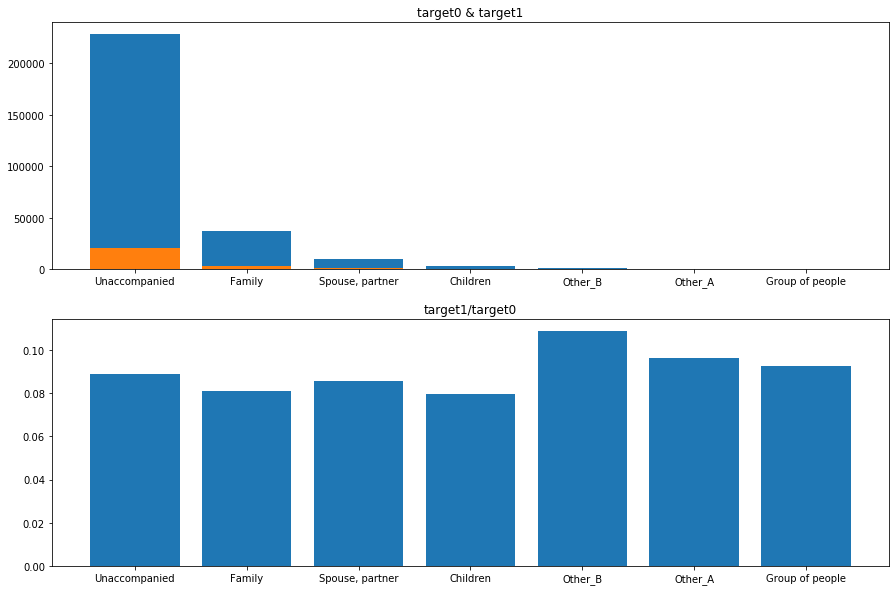

In [11]:
h_credit_0_temp1 = h_credit_0["NAME_TYPE_SUITE"]
h_credit_1_temp1 = h_credit_1["NAME_TYPE_SUITE"]

bar_graph0 = h_credit_0_temp1.value_counts()
value_list0 = []
for index, value in bar_graph0.iteritems():
    value_list0.append(value)

bar_graph1 = h_credit_1_temp1.value_counts()
value_list1 = []

value_list2 = []

for index, value in bar_graph1.iteritems():
    value_list1.append(value)
   
fig, ax = plt.subplots(figsize=[15, 10])
plt.subplot(2,1,1)
plt.title("target0 & target1")
plt.bar(bar_graph0.keys(),value_list0)
plt.bar(bar_graph1.keys(),value_list1)

for i in range(7):
    value_list2.append(value_list1[i]/value_list0[i])

plt.subplot(2,1,2)
plt.title("target1/target0")
plt.bar(bar_graph0.keys(),value_list2)
ax.add_patch(patches.Ellipse((300000, 0), 100000, 3000, fill = False, ec='r',color='w'))   

print("参考value_list2の値:{}".format(value_list2))
print("平均：{}".format(24825/282686))
# target0、target1の場合のユニーク数は７で共通。

NAME_TYPE_SUITE について  
・ローン設定時の同伴者無し（Unaccompanied）のサンプル数が圧倒的に多いので、NAME_TYPE_SUITEの重要性は乏しい（上グラフ）。  
・しかしながら、各NAME_TYPE_SUITEでのtarget1/target0を計算した棒グラフも作成してみた（下グラフ）。  
・target0のサンプル数が282686、target1のサンプル数が24825であるため、target1/target0の平均値は約0.0878となる。  
・以上から下グラフによって、NAME_TYPE_SUITEがFamily,Spouse partner,Childrenの場合には停滞リスクが減少し、Unaccompaniedの場合はわずかに上昇、肉親以外の者をNAME_TYPE_SUITEにしていると停滞リスクが上昇することが読み取れる。  

## ★DAYS_LAST_PHONE_CHANGE についての検討

<Figure size 1080x360 with 0 Axes>

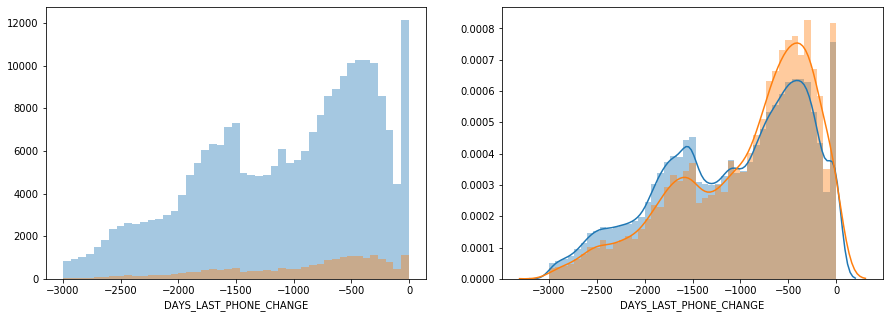

target0で携帯不所持のサンプル数:34031
target1で携帯不所持のサンプル数:3641


In [12]:
plt.figure(figsize=(15,5))

fig, ax = plt.subplots(figsize=[15, 5])
plt.subplot(1,2,1)
h_credit_0_temp = h_credit_0.query("DAYS_LAST_PHONE_CHANGE > -3000 and DAYS_LAST_PHONE_CHANGE < -1 ")
h_credit_1_temp = h_credit_1.query("DAYS_LAST_PHONE_CHANGE > -3000 and DAYS_LAST_PHONE_CHANGE < -1 ")
ax=sns.distplot(h_credit_0_temp.DAYS_LAST_PHONE_CHANGE,bins = 45, kde = False)
ax=sns.distplot(h_credit_1_temp.DAYS_LAST_PHONE_CHANGE,bins = 45, kde = False)

plt.subplot(1,2,2)
h_credit_0_temp = h_credit_0.query("DAYS_LAST_PHONE_CHANGE > -3000 and DAYS_LAST_PHONE_CHANGE < -1 ")
h_credit_1_temp = h_credit_1.query("DAYS_LAST_PHONE_CHANGE > -3000 and DAYS_LAST_PHONE_CHANGE < -1 ")
ax=sns.distplot(h_credit_0_temp.DAYS_LAST_PHONE_CHANGE,bins = 45, kde = True)
ax=sns.distplot(h_credit_1_temp.DAYS_LAST_PHONE_CHANGE,bins = 45, kde = True)
plt.show()

phone_change0 = h_credit_0.query("DAYS_LAST_PHONE_CHANGE == 0")
phone_change1 = h_credit_1.query("DAYS_LAST_PHONE_CHANGE == 0")

print("target0で携帯不所持のサンプル数:{}".format(len(phone_change0)))
print("target1で携帯不所持のサンプル数:{}".format(len(phone_change1)))

　度数分布表での視認性のため、携帯不所持の場合（DAYS_LAST_PHONE_CHANGE==0）を排除してグラフを作成した（両グラフ）。 空　度数分布表での視認性のため、携帯不所持の場合（DAYS_LAST_PHONE_CHANGE==0）を排除してグラフを作成した（両グラフ）。  
　また携帯不所持の場合は、数値のみ計算をして考察をする。  

・携帯不所持の場合：target1/target0 = 3641／34031 > 24825／282686　であるため、携帯不所持の場合は停滞リスクが向上する。  
・右グラフは、左の度数分布表を確率密度に変換したものである。右グラフで示されるように、携帯買い替え年数３年未満では、target1 > target0となっているため、停滞リスクが向上するものと考えられる。  

　以上から、「携帯を持っていない者」は、社会的な繫がりや信用を軽視する傾向を有している可能性があり、停滞リスクが向上する。  
また、「携帯を３年以内に変更している者」は、浪費家的傾向あるいは衝動的な傾向を有している可能性があり、停滞リスクが向上する。
詳細な検討は省略するが、「携帯を変更して間もない者（１～３０日程度）」も、上記の者らと同様の傾向を有していることが想定され、停滞リスクが向上するものと思われる。  
 

## ★AMT_REQ_CREDIT_BUREAU_HOUR～YEARについて
　傾向を見つけるのが難しそうなので、グラフ化はやめておく。  
  hourやyearではtarget1の平均値のほうが高いが、他ではtarget0の平均値のほうが高くなる。単純に問い合わせ回数が多いからといって、停滞リスクが高くなるわけでもなさそうだ。  

# ★★ DAYS_EMPLOYED, DAYS_BIRTH,  OCCUPATION_TYPEなどについて

##  ★DAYS_BIRTH と DAYS_EMPLOYEDについて

<Figure size 1080x360 with 0 Axes>

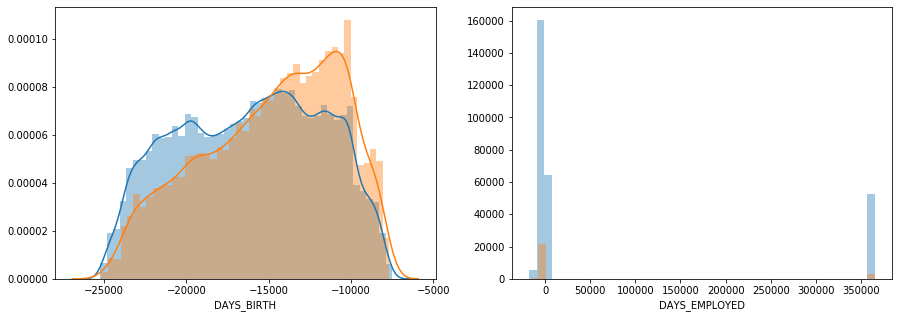

In [12]:
plt.figure(figsize=(15,5))

fig, ax = plt.subplots(figsize=[15, 5])
plt.subplot(1,2,1)
h_credit_0_temp = h_credit_0.DAYS_BIRTH
h_credit_1_temp = h_credit_1.DAYS_BIRTH
ax=sns.distplot(h_credit_0_temp, bins = 45, kde = True)
ax=sns.distplot(h_credit_1_temp, bins = 45, kde = True)

plt.subplot(1,2,2)
h_credit_0_temp = h_credit_0.DAYS_EMPLOYED
h_credit_1_temp = h_credit_1.DAYS_EMPLOYED
ax=sns.distplot(h_credit_0_temp, bins = 45, kde = False)
ax=sns.distplot(h_credit_1_temp, bins = 45, kde = False)
plt.show()


・ＤＡＹＳ＿ＢＩＲＴＨのグラフ（左側）からは、年齢が４０歳を超えるころ（－15000以下）になると停滞リスクが減少していくと言えそうだ。  
・ＤＡＹＳ＿ＥＭＰＬＯＹＤ（右側）では、365243で異常値が出ている。これは365日の100倍であり、雇用経過日数がマイナスで表現されていることを加味すると、雇用されていない者に相当するものと考えられる。

##  ★DAYS_EMPLOYEDについて（２）

target0の非雇用者:52385
target1の非雇用者:2991


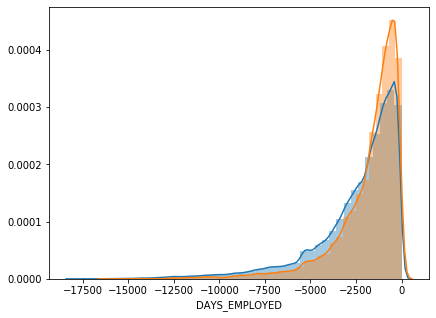

In [38]:
fig, ax = plt.subplots(figsize=[15, 5])
plt.subplot(1,2,1)
h_credit_0_temp = h_credit_0.query("DAYS_EMPLOYED < 1")
h_credit_1_temp = h_credit_1.query("DAYS_EMPLOYED < 1")
ax=sns.distplot(h_credit_0_temp.DAYS_EMPLOYED, bins = 45, kde = True)
ax=sns.distplot(h_credit_1_temp.DAYS_EMPLOYED, bins = 45, kde = True)

employ_change0 = h_credit_0.query("DAYS_EMPLOYED > -1")
employ_change1 = h_credit_1.query("DAYS_EMPLOYED > -1")

print("target0の非雇用者:{}".format(len(employ_change0)))
print("target1の非雇用者:{}".format(len(employ_change1)))

DAY_EMPLOYEDの確率密度関数から、雇用期間が浅いものの方が、停滞リスクが高いことが読み取れる。  
なお非雇用者には、無職である者のほかに経営者とが含まれていると思われ、非雇用者だからと言って停滞リスクが高まるわけではないと考えられる。  （むしろ停滞リスクが低くなりそうだ。∵ 2990／52384　＜　24825／282686）

## ★ ORGANIZATION_TYPEについて

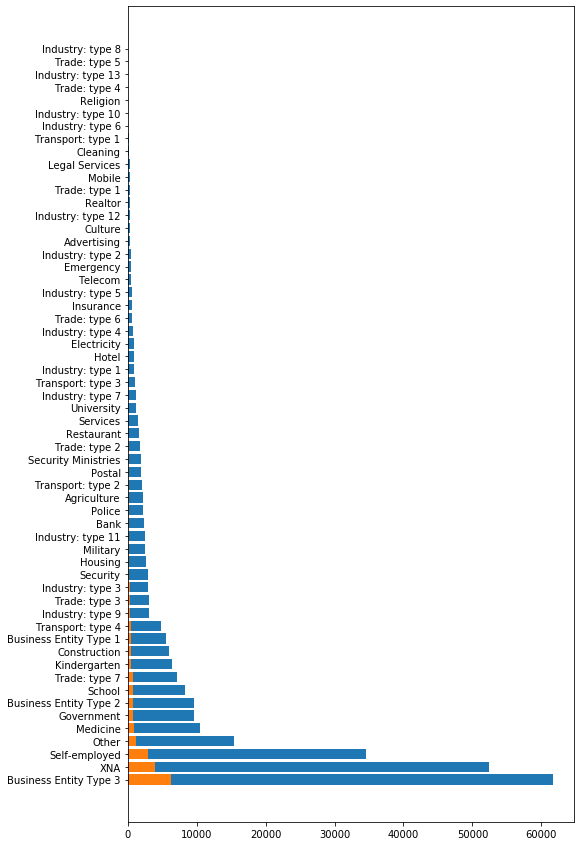

各職業におけるtarget1/target0の値


array([0.10253126, 0.07460293, 0.08665662, 0.08274922, 0.08607498,
       0.0811118 , 0.07666011, 0.08808414, 0.1023833 , 0.0822389 ,
       0.08440027, 0.08859378, 0.09883602, 0.11485842, 0.1111466 ,
       0.1105802 , 0.08792337, 0.08630187, 0.09363745, 0.09109312,
       0.08918805, 0.08408273, 0.08284024, 0.08464567, 0.06835443,
       0.07082002, 0.07357102, 0.07317073, 0.07817811, 0.08320127,
       0.08652246, 0.096     , 0.09632035, 0.07190265, 0.07102593,
       0.0786802 , 0.0730897 , 0.07460036, 0.0734767 , 0.0750469 ,
       0.06730769, 0.08      , 0.08375635, 0.08659218, 0.08169014,
       0.0819209 , 0.09148265, 0.08333333, 0.0747331 , 0.06060606,
       0.046875  , 0.08653846, 0.07843137, 0.0875    , 0.08064516,
       0.05172414, 0.06521739, 0.0952381 ])

In [41]:
h_credit_0_temp = h_credit_0.ORGANIZATION_TYPE
h_credit_1_temp = h_credit_1.ORGANIZATION_TYPE

bar_graph0 = h_credit_0_temp.value_counts()
value_list0 = []
for index, value in bar_graph0.iteritems():
    value_list0.append(value)

bar_graph1 = h_credit_1_temp.value_counts()
value_list1 = []
for index, value in bar_graph1.iteritems():
    value_list1.append(value)

fig, ax = plt.subplots(figsize=[8,15])

plt.barh(bar_graph0.keys(), value_list0)
plt.barh(bar_graph0.keys(), value_list1)
plt.show()

print("各職業におけるtarget1/target0の値")
bar_graph1.values/bar_graph0.values

### organizationによって、停滞リスクの高低があるかもしれないが、organizationの名称がわかりづらい。

## OCCUPATION_TYPE について

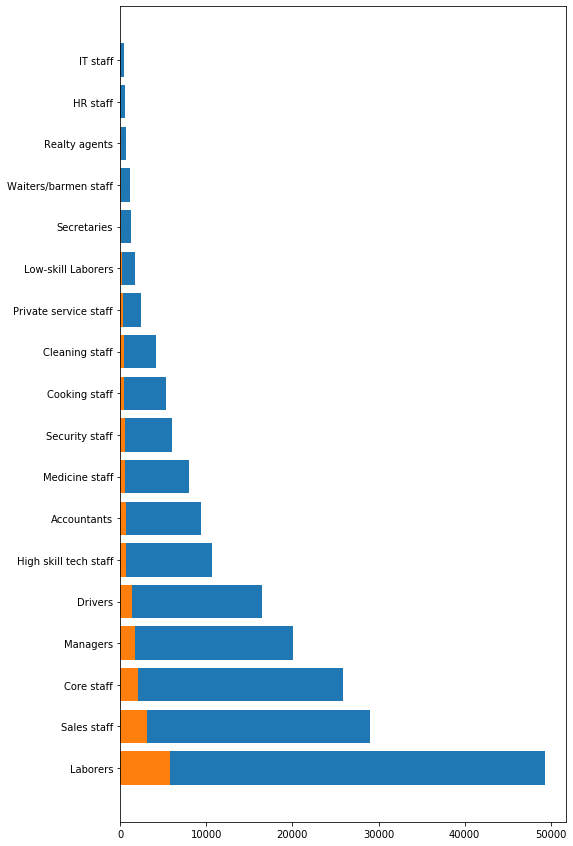

各職業におけるtarget1/target0の値


array([0.11830267, 0.10658394, 0.0815655 , 0.08671357, 0.08050436,
       0.06760933, 0.07506157, 0.0779661 , 0.09534922, 0.08901408,
       0.10627675, 0.14493339, 0.10092272, 0.12530915, 0.07692308,
       0.08526012, 0.0683112 , 0.06910569])

In [42]:
h_credit_0_temp = h_credit_0.OCCUPATION_TYPE
h_credit_1_temp = h_credit_1.OCCUPATION_TYPE

bar_graph0 = h_credit_0_temp.value_counts()
value_list0 = []
for index, value in bar_graph0.iteritems():
    value_list0.append(value)

bar_graph1 = h_credit_1_temp.value_counts()
value_list1 = []
for index, value in bar_graph1.iteritems():
    value_list1.append(value)

fig, ax = plt.subplots(figsize=[8,15])

plt.barh(bar_graph0.keys(), value_list0)
plt.barh(bar_graph0.keys(), value_list1)
plt.show()

print("各職業におけるtarget1/target0の値")
bar_graph1.values/bar_graph0.values

## laborers や Sales staffのtarget1/taeget0は0.118や0.107である。したがって平均値（24825／282686=0.0878）よりも顕著に大きいため停滞リスクが高くなる。逆にhifh skill tech staffの値は0.676であり、平均値よりも顕著に小さいので停滞リスクが低くなりそうだ。